In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.environ['MLDS'] ='/content/drive/MyDrive/MLNN DS'


In [3]:
%cd /content/drive/MyDrive/MLNN DS

/content/drive/MyDrive/MLNN DS


In [4]:
!unzip \*.zip && rm *.zip

Archive:  Group_Project_Data 2.zip
replace __MACOSX/._Group_Project_Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#avoid OOM error
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus:
#  tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
#remove doddy images
data_dir = 'Group_Project_Data'
os.listdir(data_dir)

['Valid', 'Train']

In [6]:
image_exits = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
os.listdir(os.path.join(data_dir, 'Train','Real'))

['img_1547.png',
 'img_1808.png',
 'img_1793.png',
 'img_1783.png',
 'img_1519.png',
 'img_1981.png',
 'img_2336.png',
 'img_2837.png',
 'img_1987.png',
 'img_2123.png',
 'img_2322.png',
 'img_1806.png',
 'img_2295.png',
 'img_2102.png',
 'img_2366.png',
 'img_2122.png',
 'img_2030.png',
 'img_1681.png',
 'img_2873.png',
 'img_2888.png',
 'img_2091.png',
 'img_1932.png',
 'img_2645.png',
 'img_2443.png',
 'img_1879.png',
 'img_2289.png',
 'img_2596.png',
 'img_2276.png',
 'img_2493.png',
 'img_2516.png',
 'img_2827.png',
 'img_2748.png',
 'img_1868.png',
 'img_2213.png',
 'img_2250.png',
 'img_2116.png',
 'img_1844.png',
 'img_1758.png',
 'img_1626.png',
 'img_1784.png',
 'img_1887.png',
 'img_2043.png',
 'img_2700.png',
 'img_1644.png',
 'img_1582.png',
 'img_1722.png',
 'img_2767.png',
 'img_2113.png',
 'img_2799.png',
 'img_1669.png',
 'img_1495.png',
 'img_2281.png',
 'img_1845.png',
 'img_1527.png',
 'img_2814.png',
 'img_2769.png',
 'img_2633.png',
 'img_2865.png',
 'img_2020.png

In [8]:
img = cv2.imread(os.path.join('Group_Project_Data', 'Train','Real','img_0.png'))

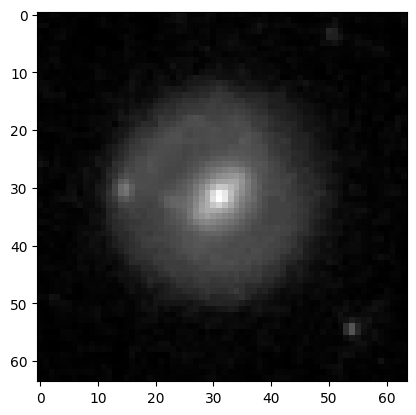

In [9]:
plt.imshow(img)

In [10]:
os.listdir(os.path.join(data_dir, 'Train','Fake'))

['img_2220.png',
 'img_1829.png',
 'img_2077.png',
 'img_2003.png',
 'img_2314.png',
 'img_2141.png',
 'img_2390.png',
 'img_1698.png',
 'img_2215.png',
 'img_2379.png',
 'img_2012.png',
 'img_2133.png',
 'img_2233.png',
 'img_1518.png',
 'img_2130.png',
 'img_1835.png',
 'img_1841.png',
 'img_2292.png',
 'img_2395.png',
 'img_1858.png',
 'img_1481.png',
 'img_1582.png',
 'img_2393.png',
 'img_2088.png',
 'img_1904.png',
 'img_1626.png',
 'img_1814.png',
 'img_2399.png',
 'img_2328.png',
 'img_1697.png',
 'img_1874.png',
 'img_1577.png',
 'img_1780.png',
 'img_1710.png',
 'img_2205.png',
 'img_1665.png',
 'img_2005.png',
 'img_2200.png',
 'img_1891.png',
 'img_1567.png',
 'img_1446.png',
 'img_1497.png',
 'img_1997.png',
 'img_2269.png',
 'img_2045.png',
 'img_2137.png',
 'img_2148.png',
 'img_2177.png',
 'img_2016.png',
 'img_1557.png',
 'img_1848.png',
 'img_1809.png',
 'img_1908.png',
 'img_2166.png',
 'img_1468.png',
 'img_1903.png',
 'img_1630.png',
 'img_1845.png',
 'img_1784.png

In [11]:
img = cv2.imread(os.path.join('Group_Project_Data', 'Train','Fake','img_0.png'))

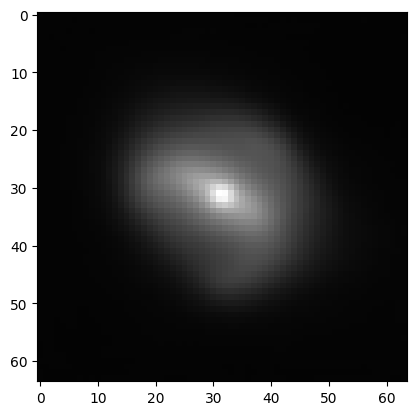

In [12]:
plt.imshow(img)

In [13]:
#find . -name "*.DS_Store" -type f -delete
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    for image_subclass in os.listdir(os.path.join(data_dir,image_class,image)):
      image_path = os.path.join(data_dir,image_class,image,image_subclass,)
      try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exits:
          print('image not in exit list{}'.format(image_path))
      except Exception as e:
            print('issue with image{}'.format(image_path))


In [14]:
os.listdir(data_dir)

['Valid', 'Train']

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

Valid
Train


In [ ]:
for image in os.listdir(os.path.join(data_dir,image_class)):
  print(image)

Real
Fake


In [15]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

Load Data


In [16]:
data = tf.keras.utils.image_dataset_from_directory('Group_Project_Data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
len(batch)

Found 8000 files belonging to 2 classes.


2

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
batch[0].max()

254.14062

In [19]:
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

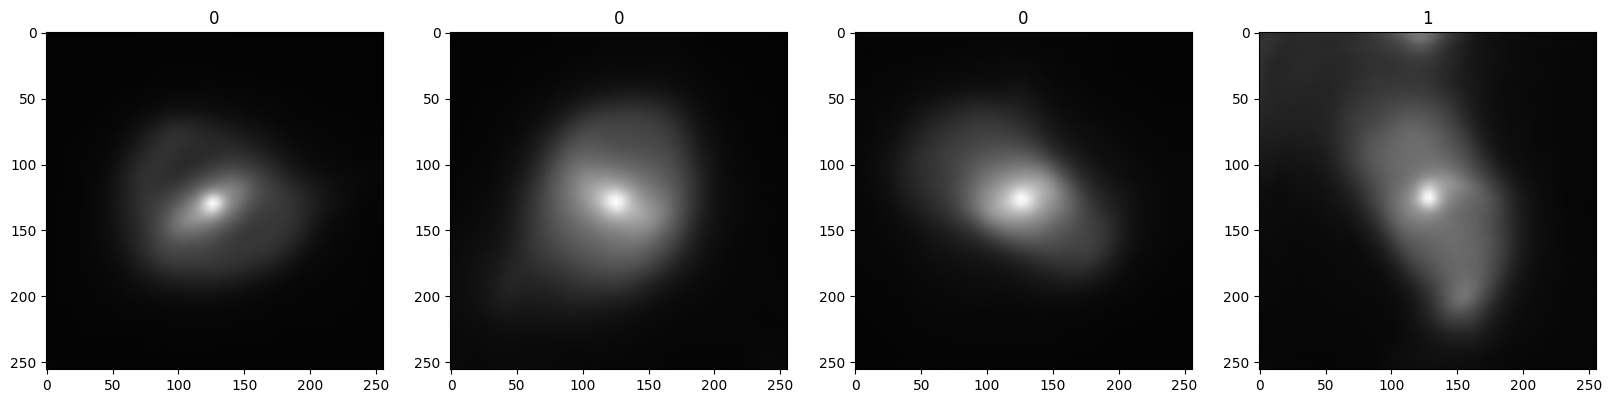

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate (batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
  #ax[idx].title.set_text(image [idx])
  #ax[idx].title.set_text(image [idx])

0 belongs to FAKE
1 belongs to Real

preprocess data

In [26]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()


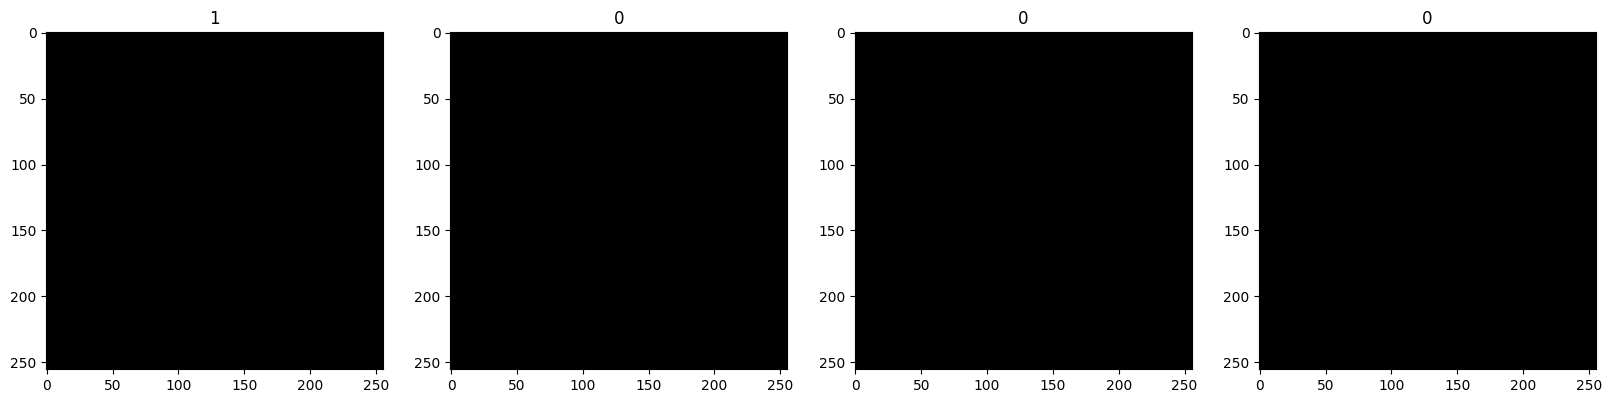

In [27]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])
  #ax[idx].title.set_text(image [idx])

split data

In [28]:
len(data)

250

In [29]:
train_size = int(len(data)*.250)+81
val_size = int(len(data)*.2)+21
test_size = int(len(data)*.1)+11


In [30]:
test_size

36

In [31]:
train_size + val_size + test_size

250

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


In [33]:
len(test)

36

Deep Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16,(3,3),1, activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D (32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))

In [37]:
from keras.api._v2.keras import metrics
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
opt= optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [39]:
logdir = 'logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [41]:
from keras import callbacks
hist = model.fit(train, epochs=20, validation_data = val, callbacks = [tensorboard_callback])
hist.history

Epoch 1/20
143/143 [==============================] - 47s 231ms/step - loss: 11.2573 - accuracy: 0.2618 - val_loss: 11.5242 - val_accuracy: 0.2443
Epoch 2/20
143/143 [==============================] - 26s 179ms/step - loss: 11.3270 - accuracy: 0.2572 - val_loss: 11.5175 - val_accuracy: 0.2447
Epoch 3/20
143/143 [==============================] - 33s 227ms/step - loss: 11.3636 - accuracy: 0.2548 - val_loss: 11.4772 - val_accuracy: 0.2474
Epoch 4/20
143/143 [==============================] - 33s 228ms/step - loss: 11.3703 - accuracy: 0.2544 - val_loss: 11.4369 - val_accuracy: 0.2500
Epoch 5/20
143/143 [==============================] - 26s 179ms/step - loss: 11.3669 - accuracy: 0.2546 - val_loss: 11.4369 - val_accuracy: 0.2500
Epoch 6/20
143/143 [==============================] - 32s 221ms/step - loss: 11.3303 - accuracy: 0.2570 - val_loss: 11.4705 - val_accuracy: 0.2478
Epoch 7/20
143/143 [==============================] - 33s 228ms/step - loss: 11.3470 - accuracy: 0.2559 - val_loss: 11

{'loss': [11.257272720336914,
  11.326963424682617,
  11.363619804382324,
  11.370284080505371,
  11.366947174072266,
  11.330292701721191,
  11.34695053100586,
  11.376946449279785,
  11.350288391113281,
  11.370280265808105,
  11.360285758972168,
  11.350287437438965,
  11.3502836227417,
  11.333625793457031,
  11.363616943359375,
  11.34362506866455,
  11.346953392028809,
  11.363614082336426,
  11.336958885192871,
  11.333625793457031],
 'accuracy': [0.26180070638656616,
  0.2572115361690521,
  0.2548076808452606,
  0.25437062978744507,
  0.25458917021751404,
  0.25699299573898315,
  0.2559003531932831,
  0.2539335787296295,
  0.2556818127632141,
  0.25437062978744507,
  0.2550262212753296,
  0.2556818127632141,
  0.2556818127632141,
  0.2567744851112366,
  0.2548076808452606,
  0.25611889362335205,
  0.2559003531932831,
  0.2548076808452606,
  0.2565559446811676,
  0.2567744851112366],
 'val_loss': [11.524179458618164,
  11.517468452453613,
  11.477198600769043,
  11.4369287490844

Plot Performance

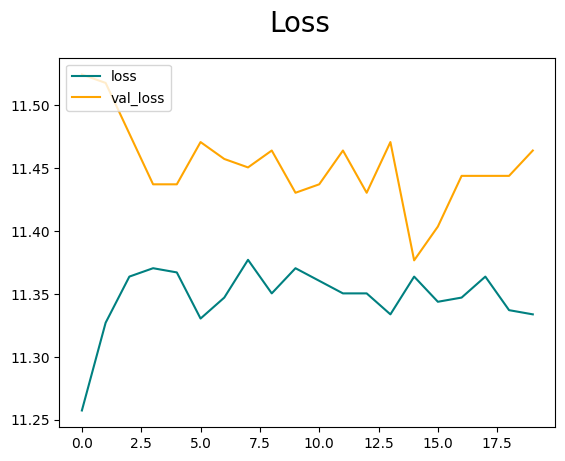

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()


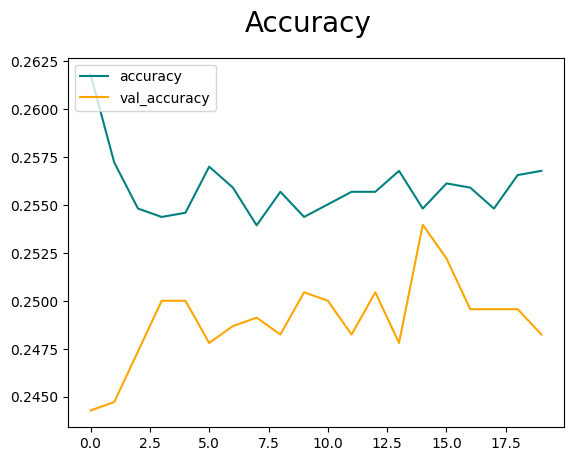

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

Evaluate Performance

In [ ]:
from tensorflow. keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test. as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

# print(f Precision:{pre.result().numpy()}, Recall:{re.resut().numpy()}, Accuracy:{acc.result().numpy()})

1/1 [==============================] - 0s 33ms/step


Test

In [ ]:
img = cv2.imread("/content/drive/MyDrive/MLNN DS/Group_Project_Data/Valid/Fake/img_1.png")
plt.imshow(img)
plt.show()

TypeError: ignored

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

Predict

In [ ]:
np.expand_dims(resize,0).shape.output(1,256,256,3)

In [ ]:
yhat = model.Predict(np.expand_dims(resize/255,0))
yhat

In [ ]:
if yhat > 0.5:
  print(f'predicted class is sad')
else:
  print(f'predicted class is Happy')